In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import load_model

In [2]:
stockFullData = pd.read_excel('C:/Users/nitun/OneDrive/Desktop/Stock Report/fno stock.xlsx');
stockFullData = stockFullData.dropna()
stockFullData
stockSymboles = stockFullData.iloc[:,2:3].astype('str').values
stockSymboles
conactNS = np.array(['.NS'])
realSymobles = np.array(stockSymboles)
realSymobles
yahooApiInput = (realSymobles + conactNS)
yahooApiInput

array([['GAIL.NS'],
       ['GNFC.NS'],
       ['DIXON.NS'],
       ['WHIRLPOOL.NS'],
       ['AARTIIND.NS'],
       ['BIOCON.NS'],
       ['GSPL.NS'],
       ['AMBUJACEM.NS'],
       ['HDFCAMC.NS'],
       ['ABCAPITAL.NS'],
       ['LALPATHLAB.NS'],
       ['CUB.NS'],
       ['SHRIRAMFIN.NS'],
       ['CHOLAFIN.NS'],
       ['NAUKRI.NS'],
       ['DIVISLAB.NS'],
       ['EXIDEIND.NS'],
       ['ADANIPORTS.NS'],
       ['IEX.NS'],
       ['ASIANPAINT.NS'],
       ['IGL.NS'],
       ['CONCOR.NS'],
       ['DEEPAKNTR.NS'],
       ['IDFCFIRSTB.NS'],
       ['NAVINFLUOR.NS'],
       ['COALINDIA.NS'],
       ['OBEROIRLTY.NS'],
       ['SBICARD.NS'],
       ['DRREDDY.NS'],
       ['PETRONET.NS'],
       ['IRCTC.NS'],
       ['DLF.NS'],
       ['BAJAJFINSV.NS'],
       ['MUTHOOTFIN.NS'],
       ['POWERGRID.NS'],
       ['AXISBANK.NS'],
       ['NTPC.NS'],
       ['AUBANK.NS'],
       ['IDEA.NS'],
       ['GRANULES.NS'],
       ['IDFC.NS'],
       ['COLPAL.NS'],
       ['RELIANCE.NS'],
       

In [3]:

# # Storing loop to run later

   

Print Start:::


NameError: name 'getDataFromYahoo' is not defined

In [3]:
def getDataFromYahoo(stockSymbole):
    storedData = yf.Ticker(stockSymbole)
    storedData = storedData.history(period="17y").iloc[:, :-3].dropna();
    storedData = storedData.iloc[:,3:4].values
    sc = MinMaxScaler(feature_range = (0, 1))
    storedData_scaled = sc.fit_transform(storedData)
    return storedData_scaled;
    

In [4]:
def dataPreapration(scaledData):
    storedLength = len(scaledData)
    testSet = scaledData[((storedLength+1)-60):storedLength+1]
    print('-----------------')
    trainingSet = scaledData[0:((storedLength+1)-60)]
    return testSet,trainingSet;

In [5]:
def getTrainingData(trainingSet):
    X_train = []
    y_train = []

    for i in range(60, len(trainingSet)):
        X_train.append(trainingSet[i-60:i, 0])
        y_train.append(trainingSet[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    return X_train,y_train

In [6]:
def createComplier(inputShape):
    regressor = Sequential()
    regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (inputShape)))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 1))
    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return regressor

In [7]:
def trainingFit(trainX,trainY,symboleName,complierName):
    complierName.fit(trainX, trainY, epochs = 100, batch_size = 32)
    complierName.save(symboleName+'.h5')


In [8]:
for i in range(len(yahooApiInput)):
    print('Print Start:::'+yahooApiInput[i][0]);
    scaledData = getDataFromYahoo(yahooApiInput[i][0]);
    testSet , trainingSet = dataPreapration(scaledData);
    x_train, y_train  = getTrainingData(trainingSet);
    regr = createComplier((x_train.shape[1], 1))
    regr = trainingFit(x_train,y_train,yahooApiInput[i][0],regr);
    print('Print End:::')

Print Start:::GAIL.NS
-----------------
Epoch 1/100
128/128 [==============================] - 23s 65ms/step - loss: 0.0111
Epoch 2/100
128/128 [==============================] - 9s 68ms/step - loss: 0.0043
Epoch 3/100
128/128 [==============================] - 9s 68ms/step - loss: 0.0037
Epoch 4/100
128/128 [==============================] - 9s 67ms/step - loss: 0.0031
Epoch 5/100
128/128 [==============================] - 10s 77ms/step - loss: 0.0029
Epoch 6/100
128/128 [==============================] - 10s 75ms/step - loss: 0.0029
Epoch 7/100
128/128 [==============================] - 9s 73ms/step - loss: 0.0025
Epoch 8/100
128/128 [==============================] - 9s 73ms/step - loss: 0.0024
Epoch 9/100
128/128 [==============================] - 9s 71ms/step - loss: 0.0024
Epoch 10/100
128/128 [==============================] - 9s 72ms/step - loss: 0.0022
Epoch 11/100
128/128 [==============================] - 9s 71ms/step - loss: 0.0022
Epoch 12/100
128/128 [====================

128/128 [==============================] - 11s 83ms/step - loss: 6.8714e-04
Epoch 96/100
128/128 [==============================] - 9s 73ms/step - loss: 6.8632e-04
Epoch 97/100
128/128 [==============================] - 9s 72ms/step - loss: 7.9945e-04
Epoch 98/100
128/128 [==============================] - 13s 104ms/step - loss: 6.6950e-04
Epoch 99/100
128/128 [==============================] - 13s 103ms/step - loss: 6.8059e-04
Epoch 100/100
128/128 [==============================] - 9s 71ms/step - loss: 6.7476e-04
Print End:::
Print Start:::GNFC.NS
-----------------
Epoch 1/100
128/128 [==============================] - 14s 74ms/step - loss: 0.0047
Epoch 2/100
128/128 [==============================] - 9s 73ms/step - loss: 0.0019
Epoch 3/100
128/128 [==============================] - 9s 72ms/step - loss: 0.0014
Epoch 4/100
128/128 [==============================] - 9s 73ms/step - loss: 0.0013
Epoch 5/100
128/128 [==============================] - 9s 73ms/step - loss: 0.0011
Epoch 6/10

128/128 [==============================] - 9s 73ms/step - loss: 4.5110e-04
Epoch 88/100
128/128 [==============================] - 9s 73ms/step - loss: 4.3136e-04
Epoch 89/100
128/128 [==============================] - 9s 72ms/step - loss: 4.0056e-04
Epoch 90/100
128/128 [==============================] - 10s 76ms/step - loss: 4.4479e-04
Epoch 91/100
128/128 [==============================] - 9s 74ms/step - loss: 4.1883e-04
Epoch 92/100
128/128 [==============================] - 9s 74ms/step - loss: 4.1619e-04
Epoch 93/100
128/128 [==============================] - 9s 74ms/step - loss: 3.7654e-04
Epoch 94/100
128/128 [==============================] - 9s 74ms/step - loss: 4.2885e-04
Epoch 95/100
128/128 [==============================] - 11s 85ms/step - loss: 3.8830e-04
Epoch 96/100
128/128 [==============================] - 12s 95ms/step - loss: 3.9195e-04
Epoch 97/100
128/128 [==============================] - 12s 94ms/step - loss: 4.3443e-04
Epoch 98/100
128/128 [===================

39/39 [==============================] - 3s 82ms/step - loss: 0.0014
Epoch 86/100
39/39 [==============================] - 3s 81ms/step - loss: 0.0017
Epoch 87/100
39/39 [==============================] - 3s 84ms/step - loss: 0.0012
Epoch 88/100
39/39 [==============================] - 3s 88ms/step - loss: 0.0013
Epoch 89/100
39/39 [==============================] - 3s 86ms/step - loss: 0.0013
Epoch 90/100
39/39 [==============================] - 3s 84ms/step - loss: 0.0014
Epoch 91/100
39/39 [==============================] - 3s 85ms/step - loss: 0.0014
Epoch 92/100
39/39 [==============================] - 3s 82ms/step - loss: 0.0014
Epoch 93/100
39/39 [==============================] - 3s 81ms/step - loss: 0.0013
Epoch 94/100
39/39 [==============================] - 3s 82ms/step - loss: 0.0013
Epoch 95/100
39/39 [==============================] - 3s 81ms/step - loss: 0.0014
Epoch 96/100
39/39 [==============================] - 3s 73ms/step - loss: 0.0013
Epoch 97/100
39/39 [=========

128/128 [==============================] - 8s 63ms/step - loss: 7.7461e-04
Epoch 81/100
128/128 [==============================] - 8s 64ms/step - loss: 8.4667e-04
Epoch 82/100
128/128 [==============================] - 8s 64ms/step - loss: 7.1531e-04
Epoch 83/100
128/128 [==============================] - 8s 65ms/step - loss: 7.5161e-04
Epoch 84/100
128/128 [==============================] - 8s 66ms/step - loss: 7.0225e-04
Epoch 85/100
128/128 [==============================] - 10s 76ms/step - loss: 7.7654e-04
Epoch 86/100
128/128 [==============================] - 10s 77ms/step - loss: 8.0768e-04
Epoch 87/100
128/128 [==============================] - 10s 80ms/step - loss: 8.0306e-04
Epoch 88/100
128/128 [==============================] - 9s 71ms/step - loss: 7.6442e-04
Epoch 89/100
128/128 [==============================] - 9s 70ms/step - loss: 8.1903e-04
Epoch 90/100
128/128 [==============================] - 9s 68ms/step - loss: 7.4883e-04
Epoch 91/100
128/128 [====================

128/128 [==============================] - 8s 61ms/step - loss: 5.2603e-04
Epoch 74/100
128/128 [==============================] - 8s 61ms/step - loss: 6.1392e-04
Epoch 75/100
128/128 [==============================] - 8s 62ms/step - loss: 6.2588e-04
Epoch 76/100
128/128 [==============================] - 8s 61ms/step - loss: 5.3742e-04
Epoch 77/100
128/128 [==============================] - 8s 61ms/step - loss: 5.6323e-04
Epoch 78/100
128/128 [==============================] - 8s 61ms/step - loss: 5.6777e-04
Epoch 79/100
128/128 [==============================] - 8s 61ms/step - loss: 6.1935e-04
Epoch 80/100
128/128 [==============================] - 8s 61ms/step - loss: 5.7388e-04
Epoch 81/100
128/128 [==============================] - 8s 62ms/step - loss: 5.9830e-04
Epoch 82/100
128/128 [==============================] - 8s 63ms/step - loss: 5.3187e-04
Epoch 83/100
128/128 [==============================] - 8s 61ms/step - loss: 5.4148e-04
Epoch 84/100
128/128 [=======================

128/128 [==============================] - 10s 79ms/step - loss: 7.5216e-04
Epoch 67/100
128/128 [==============================] - 10s 78ms/step - loss: 8.1740e-04
Epoch 68/100
128/128 [==============================] - 10s 78ms/step - loss: 7.4124e-04
Epoch 69/100
128/128 [==============================] - 10s 79ms/step - loss: 7.6902e-04
Epoch 70/100
128/128 [==============================] - 10s 78ms/step - loss: 8.1440e-04
Epoch 71/100
128/128 [==============================] - 10s 78ms/step - loss: 7.2966e-04
Epoch 72/100
128/128 [==============================] - 11s 83ms/step - loss: 6.8470e-04
Epoch 73/100
128/128 [==============================] - 10s 78ms/step - loss: 7.4157e-04
Epoch 74/100
128/128 [==============================] - 10s 78ms/step - loss: 7.2161e-04
Epoch 75/100
128/128 [==============================] - 10s 82ms/step - loss: 7.8993e-04
Epoch 76/100
128/128 [==============================] - 10s 78ms/step - loss: 7.9524e-04
Epoch 77/100
128/128 [============

128/128 [==============================] - 8s 61ms/step - loss: 5.9704e-04
Epoch 60/100
128/128 [==============================] - 8s 62ms/step - loss: 6.0878e-04
Epoch 61/100
128/128 [==============================] - 8s 61ms/step - loss: 5.9216e-04
Epoch 62/100
128/128 [==============================] - 8s 62ms/step - loss: 6.2974e-04
Epoch 63/100
128/128 [==============================] - 8s 61ms/step - loss: 5.6233e-04
Epoch 64/100
128/128 [==============================] - 8s 61ms/step - loss: 5.3556e-04
Epoch 65/100
128/128 [==============================] - 8s 61ms/step - loss: 6.1506e-04
Epoch 66/100
128/128 [==============================] - 8s 62ms/step - loss: 6.1511e-04
Epoch 67/100
128/128 [==============================] - 8s 62ms/step - loss: 5.6126e-04
Epoch 68/100
128/128 [==============================] - 8s 62ms/step - loss: 5.4376e-04
Epoch 69/100
128/128 [==============================] - 12s 91ms/step - loss: 6.3143e-04
Epoch 70/100
128/128 [======================

128/128 [==============================] - 9s 73ms/step - loss: 3.9720e-04
Epoch 52/100
128/128 [==============================] - 9s 73ms/step - loss: 3.7108e-04
Epoch 53/100
128/128 [==============================] - 10s 75ms/step - loss: 4.2759e-04
Epoch 54/100
128/128 [==============================] - 9s 73ms/step - loss: 4.6777e-04
Epoch 55/100
128/128 [==============================] - 12s 97ms/step - loss: 3.7732e-04
Epoch 56/100
128/128 [==============================] - 12s 92ms/step - loss: 3.3524e-04
Epoch 57/100
128/128 [==============================] - 10s 76ms/step - loss: 3.7638e-04
Epoch 58/100
128/128 [==============================] - 9s 72ms/step - loss: 3.5992e-04
Epoch 59/100
128/128 [==============================] - 8s 63ms/step - loss: 3.8238e-04
Epoch 60/100
128/128 [==============================] - 8s 64ms/step - loss: 3.3692e-04
Epoch 61/100
128/128 [==============================] - 8s 65ms/step - loss: 4.1185e-04
Epoch 62/100
128/128 [===================

32/32 [==============================] - 2s 70ms/step - loss: 0.0028
Epoch 47/100
32/32 [==============================] - 2s 70ms/step - loss: 0.0027
Epoch 48/100
32/32 [==============================] - 2s 71ms/step - loss: 0.0025
Epoch 49/100
32/32 [==============================] - 2s 71ms/step - loss: 0.0024
Epoch 50/100
32/32 [==============================] - 2s 72ms/step - loss: 0.0026
Epoch 51/100
32/32 [==============================] - 2s 71ms/step - loss: 0.0026
Epoch 52/100
32/32 [==============================] - 2s 71ms/step - loss: 0.0022
Epoch 53/100
32/32 [==============================] - 2s 71ms/step - loss: 0.0023
Epoch 54/100
32/32 [==============================] - 2s 72ms/step - loss: 0.0023
Epoch 55/100
32/32 [==============================] - 2s 70ms/step - loss: 0.0024
Epoch 56/100
32/32 [==============================] - 2s 72ms/step - loss: 0.0020
Epoch 57/100
32/32 [==============================] - 2s 75ms/step - loss: 0.0025
Epoch 58/100
32/32 [=========

39/39 [==============================] - 2s 64ms/step - loss: 0.0011
Epoch 46/100
39/39 [==============================] - 2s 63ms/step - loss: 9.3999e-04
Epoch 47/100
39/39 [==============================] - 3s 64ms/step - loss: 9.8385e-04
Epoch 48/100
39/39 [==============================] - 3s 66ms/step - loss: 0.0011
Epoch 49/100
39/39 [==============================] - 3s 67ms/step - loss: 9.4258e-04
Epoch 50/100
39/39 [==============================] - 3s 68ms/step - loss: 9.2634e-04
Epoch 51/100
39/39 [==============================] - 3s 67ms/step - loss: 9.7889e-04
Epoch 52/100
39/39 [==============================] - 3s 68ms/step - loss: 8.1572e-04
Epoch 53/100
39/39 [==============================] - 3s 66ms/step - loss: 9.2198e-04
Epoch 54/100
39/39 [==============================] - 3s 64ms/step - loss: 7.8159e-04
Epoch 55/100
39/39 [==============================] - 3s 66ms/step - loss: 8.6131e-04
Epoch 56/100
39/39 [==============================] - 3s 74ms/step - loss: 

52/52 [==============================] - 3s 64ms/step - loss: 0.0016
Epoch 42/100
52/52 [==============================] - 3s 64ms/step - loss: 0.0013
Epoch 43/100
52/52 [==============================] - 3s 64ms/step - loss: 0.0013
Epoch 44/100
52/52 [==============================] - 3s 65ms/step - loss: 0.0013
Epoch 45/100
52/52 [==============================] - 3s 64ms/step - loss: 0.0012
Epoch 46/100
52/52 [==============================] - 3s 64ms/step - loss: 0.0012
Epoch 47/100
52/52 [==============================] - 3s 64ms/step - loss: 0.0013
Epoch 48/100
52/52 [==============================] - 3s 64ms/step - loss: 0.0014
Epoch 49/100
52/52 [==============================] - 3s 64ms/step - loss: 0.0012
Epoch 50/100
52/52 [==============================] - 3s 64ms/step - loss: 0.0012
Epoch 51/100
52/52 [==============================] - 3s 64ms/step - loss: 0.0012
Epoch 52/100
52/52 [==============================] - 3s 64ms/step - loss: 0.0012
Epoch 53/100
52/52 [=========

128/128 [==============================] - 8s 62ms/step - loss: 9.6527e-04
Epoch 39/100
128/128 [==============================] - 1863s 15s/step - loss: 9.5474e-04
Epoch 40/100
128/128 [==============================] - 7s 53ms/step - loss: 9.3768e-04
Epoch 41/100
128/128 [==============================] - 6s 50ms/step - loss: 9.5861e-04
Epoch 42/100
128/128 [==============================] - 7s 58ms/step - loss: 8.7763e-04
Epoch 43/100
128/128 [==============================] - 9s 72ms/step - loss: 9.1347e-04
Epoch 44/100
128/128 [==============================] - 9s 70ms/step - loss: 8.9219e-04
Epoch 45/100
128/128 [==============================] - 8s 65ms/step - loss: 9.2593e-04
Epoch 46/100
128/128 [==============================] - 8s 65ms/step - loss: 8.7293e-04
Epoch 47/100
128/128 [==============================] - 9s 67ms/step - loss: 8.7692e-04
Epoch 48/100
128/128 [==============================] - 8s 64ms/step - loss: 8.8160e-04
Epoch 49/100
128/128 [=====================

128/128 [==============================] - 9s 73ms/step - loss: 0.0012
Epoch 32/100
128/128 [==============================] - 9s 73ms/step - loss: 0.0011
Epoch 33/100
128/128 [==============================] - 9s 73ms/step - loss: 0.0011
Epoch 34/100
128/128 [==============================] - 9s 73ms/step - loss: 0.0011
Epoch 35/100
128/128 [==============================] - 10s 75ms/step - loss: 0.0010
Epoch 36/100
128/128 [==============================] - 9s 73ms/step - loss: 9.7079e-04
Epoch 37/100
128/128 [==============================] - 9s 74ms/step - loss: 0.0011
Epoch 38/100
128/128 [==============================] - 9s 73ms/step - loss: 0.0010
Epoch 39/100
128/128 [==============================] - 9s 74ms/step - loss: 9.6200e-04
Epoch 40/100
128/128 [==============================] - 9s 73ms/step - loss: 9.4012e-04
Epoch 41/100
128/128 [==============================] - 9s 73ms/step - loss: 9.3496e-04
Epoch 42/100
128/128 [==============================] - 9s 73ms/step - l

128/128 [==============================] - 12s 90ms/step - loss: 7.5245e-04
Epoch 25/100
128/128 [==============================] - 12s 90ms/step - loss: 6.8494e-04
Epoch 26/100
128/128 [==============================] - 12s 90ms/step - loss: 7.6337e-04
Epoch 27/100
128/128 [==============================] - 12s 90ms/step - loss: 6.8835e-04
Epoch 28/100
128/128 [==============================] - 12s 90ms/step - loss: 7.7398e-04
Epoch 29/100
128/128 [==============================] - 12s 91ms/step - loss: 6.6705e-04
Epoch 30/100
128/128 [==============================] - 12s 90ms/step - loss: 7.0319e-04
Epoch 31/100
128/128 [==============================] - 12s 90ms/step - loss: 6.7146e-04
Epoch 32/100
128/128 [==============================] - 12s 90ms/step - loss: 6.7777e-04
Epoch 33/100
128/128 [==============================] - 12s 90ms/step - loss: 6.3176e-04
Epoch 34/100
128/128 [==============================] - 12s 91ms/step - loss: 8.1811e-04
Epoch 35/100
128/128 [============

122/122 [==============================] - 11s 91ms/step - loss: 7.5596e-04
Epoch 17/100
122/122 [==============================] - 11s 91ms/step - loss: 8.7153e-04
Epoch 18/100
122/122 [==============================] - 11s 91ms/step - loss: 9.1559e-04
Epoch 19/100
122/122 [==============================] - 11s 91ms/step - loss: 9.2247e-04
Epoch 20/100
122/122 [==============================] - 11s 91ms/step - loss: 7.1363e-04
Epoch 21/100
122/122 [==============================] - 14s 115ms/step - loss: 6.7856e-04
Epoch 22/100
122/122 [==============================] - 13s 110ms/step - loss: 7.9041e-04
Epoch 23/100
122/122 [==============================] - 11s 91ms/step - loss: 6.8253e-04
Epoch 24/100
122/122 [==============================] - 11s 91ms/step - loss: 7.3958e-04
Epoch 25/100
122/122 [==============================] - 11s 91ms/step - loss: 8.6900e-04
Epoch 26/100
122/122 [==============================] - 11s 91ms/step - loss: 8.0290e-04
Epoch 27/100
122/122 [==========

128/128 [==============================] - 10s 78ms/step - loss: 0.0011
Epoch 8/100
128/128 [==============================] - 10s 79ms/step - loss: 0.0011
Epoch 9/100
128/128 [==============================] - 10s 78ms/step - loss: 8.8598e-04
Epoch 10/100
128/128 [==============================] - 10s 78ms/step - loss: 0.0010
Epoch 11/100
128/128 [==============================] - 10s 78ms/step - loss: 9.7193e-04
Epoch 12/100
128/128 [==============================] - 10s 78ms/step - loss: 9.2341e-04
Epoch 13/100
128/128 [==============================] - 10s 78ms/step - loss: 8.1328e-04
Epoch 14/100
128/128 [==============================] - 10s 77ms/step - loss: 8.8038e-04
Epoch 15/100
128/128 [==============================] - 10s 78ms/step - loss: 8.0510e-04
Epoch 16/100
128/128 [==============================] - 10s 78ms/step - loss: 8.2652e-04
Epoch 17/100
128/128 [==============================] - 10s 78ms/step - loss: 0.0010
Epoch 18/100
128/128 [==============================

128/128 [==============================] - 10s 77ms/step - loss: 5.4410e-04
Epoch 100/100
128/128 [==============================] - 10s 77ms/step - loss: 5.8007e-04
Print End:::
Print Start:::EXIDEIND.NS
-----------------
Epoch 1/100
128/128 [==============================] - 16s 89ms/step - loss: 0.0106
Epoch 2/100
128/128 [==============================] - 11s 89ms/step - loss: 0.0034
Epoch 3/100
128/128 [==============================] - 11s 89ms/step - loss: 0.0028
Epoch 4/100
128/128 [==============================] - 11s 89ms/step - loss: 0.0025
Epoch 5/100
128/128 [==============================] - 11s 89ms/step - loss: 0.0024
Epoch 6/100
128/128 [==============================] - 11s 89ms/step - loss: 0.0022
Epoch 7/100
128/128 [==============================] - 11s 89ms/step - loss: 0.0019
Epoch 8/100
128/128 [==============================] - 11s 89ms/step - loss: 0.0018
Epoch 9/100
128/128 [==============================] - 11s 89ms/step - loss: 0.0020
Epoch 10/100
128/128 

KeyboardInterrupt: 

In [20]:
scaledData = getDataFromYahoo('MOTOGENFIN.NS');

In [21]:
testSet , trainingSet = dataPreapration(scaledData);

-----------------


In [22]:
x_train, y_train  = getTrainingData(trainingSet);

In [23]:
regr = createComplier((x_train.shape[1], 1))

In [33]:
regr = trainingFit(x_train,y_train,'MOTOGENFIN',regr);

Epoch 1/5
128/128 [==============================] - 19s 148ms/step - loss: 5.9555e-04
Epoch 2/5
128/128 [==============================] - 19s 148ms/step - loss: 5.7329e-04
Epoch 3/5
128/128 [==============================] - 19s 149ms/step - loss: 5.9309e-04
Epoch 4/5
128/128 [==============================] - 19s 147ms/step - loss: 5.6371e-04
Epoch 5/5
128/128 [==============================] - 19s 149ms/step - loss: 5.7376e-04


In [34]:
loaded_model = load_model('MOTOGENFIN.h5')

In [35]:
# MOTOGENFIN.NS
MOTOGENFINNS = yf.Ticker("MOTOGENFIN.NS")
storedData = MOTOGENFINNS.history(period="17y").iloc[:, :-3].dropna()
storedData

,Open,High,Low,Close
Date,,,,
2006-02-17 00:00:00+05:30,9.588240,9.632022,9.259875,9.281767
2006-02-20 00:00:00+05:30,9.632021,9.632021,8.865838,9.062857
2006-02-21 00:00:00+05:30,9.194202,9.500676,9.040966,9.194202
2006-02-22 00:00:00+05:30,8.953403,9.456894,8.822056,8.975293
2006-02-23 00:00:00+05:30,8.756384,9.325548,8.756384,9.019075
...,...,...,...,...
2023-02-13 00:00:00+05:30,39.700001,41.400002,36.349998,40.950001
2023-02-14 00:00:00+05:30,44.000000,44.500000,41.200001,42.150002
2023-02-15 00:00:00+05:30,38.650002,39.500000,37.950001,37.950001


In [36]:
storedData = storedData.iloc[:,3:4].values

In [37]:

sc = MinMaxScaler(feature_range = (0, 1))
storedData_scaled = sc.fit_transform(storedData)
storedData_scaled


array([[0.04615389],
       [0.04045586],
       [0.04387467],
       ...,
       [0.79236047],
       [0.69345014],
       [0.65440658]])

In [38]:
storedLength = len(storedData_scaled)
testSet = storedData_scaled[((storedLength+1)-60):storedLength+1]

print('-----------------')
trainingSet = storedData_scaled[0:((storedLength+1)-60)]



-----------------


In [39]:
X_train = []
y_train = []

for i in range(60, len(trainingSet)):
    X_train.append(trainingSet[i-60:i, 0])
    y_train.append(trainingSet[i, 0])
   


X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(4077, 60, 1)

In [40]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [92]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [93]:
regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
128/128 [==============================] - 16s 47ms/step - loss: 0.0083
Epoch 2/200
128/128 [==============================] - 6s 47ms/step - loss: 0.0038
Epoch 3/200
128/128 [==============================] - 7s 56ms/step - loss: 0.0030
Epoch 4/200
128/128 [==============================] - 8s 60ms/step - loss: 0.0027
Epoch 5/200
128/128 [==============================] - 7s 57ms/step - loss: 0.0022
Epoch 6/200
128/128 [==============================] - 7s 57ms/step - loss: 0.0021
Epoch 7/200
128/128 [==============================] - 7s 57ms/step - loss: 0.0019
Epoch 8/200
128/128 [==============================] - 7s 57ms/step - loss: 0.0019
Epoch 9/200
128/128 [==============================] - 7s 56ms/step - loss: 0.0017
Epoch 10/200
128/128 [==============================] - 7s 56ms/step - loss: 0.0016
Epoch 11/200
128/128 [==============================] - 7s 56ms/step - loss: 0.0014
Epoch 12/200
128/128 [==============================] - 7s 58ms/step - loss: 0.0014


128/128 [==============================] - 8s 61ms/step - loss: 5.1518e-04
Epoch 187/200
128/128 [==============================] - 8s 60ms/step - loss: 5.0197e-04
Epoch 188/200
128/128 [==============================] - 8s 60ms/step - loss: 5.0159e-04
Epoch 189/200
128/128 [==============================] - 8s 60ms/step - loss: 4.8290e-04
Epoch 190/200
128/128 [==============================] - 8s 60ms/step - loss: 4.7546e-04
Epoch 191/200
128/128 [==============================] - 8s 61ms/step - loss: 5.1253e-04
Epoch 192/200
128/128 [==============================] - 9s 67ms/step - loss: 4.7957e-04
Epoch 193/200
128/128 [==============================] - 9s 68ms/step - loss: 4.8821e-04
Epoch 194/200
128/128 [==============================] - 9s 68ms/step - loss: 4.6900e-04
Epoch 195/200
128/128 [==============================] - 9s 72ms/step - loss: 4.7584e-04
Epoch 196/200
128/128 [==============================] - 9s 68ms/step - loss: 4.9244e-04
Epoch 197/200
128/128 [============

In [41]:
MOTOGENFINNS = yf.Ticker("MOTOGENFIN.NS")
test = MOTOGENFINNS.history(period="17y").iloc[:,3:4].dropna().tail(60)
test
dat11 = test.tail(60).values
test

,Close
Date,
2022-11-25 00:00:00+05:30,25.500000
2022-11-28 00:00:00+05:30,25.000000
2022-11-29 00:00:00+05:30,24.299999
2022-11-30 00:00:00+05:30,24.600000
2022-12-01 00:00:00+05:30,24.850000
2022-12-02 00:00:00+05:30,25.299999
2022-12-05 00:00:00+05:30,25.500000
2022-12-06 00:00:00+05:30,25.450001
2022-12-07 00:00:00+05:30,25.400000


In [70]:
# testSet
# storedData_scaled
# inputs = storedData_scaled[len(trainingSet)-60 : (len(storedData_scaled))]
dat = test.values
inputs = dat.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
len(inputs)

for i in range(60, (len(inputs)+1)):
    X_test.append(inputs[i-60:i, 0])
  
X_test = np.array(X_test)
len(X_test)

X_train, y_train = np.array(X_train), np.array(y_train)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = loaded_model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

# test.loc[len(test)] = 
le = ["",""]
# v = pd.DataFrame(predicted_stock_price[0])
# pd.concat([test,v])
test.append(pd.Series(le, index=test.columns[:len(le)]), ignore_index=True)
test

1/1 [==============================] - 0s 92ms/step
[[32.184826]]


ValueError: Length of values (2) does not match length of index (1)

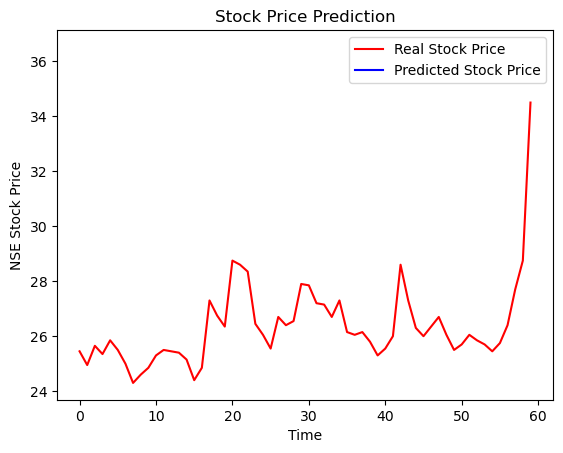

In [181]:
plt.plot(dat11, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NSE Stock Price')
plt.legend()
plt.show()